In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')


In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


### How many rows and columns are in `gdp_df`? 

In [5]:
gdp_df.shape

(8219, 4)

### What are the data types of each column?

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


### Drop the 'Value Footnotes' Column

In [7]:
gdp_df = gdp_df.drop(columns='Value Footnotes')

### Rename the Remaining Columns

In [38]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


###  How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [177]:
total_years = gdp_df['Year'].nunique()

country_year_counts = gdp_df.groupby('Country')['Year'].nunique()
complete_countries = country_year_counts[country_year_counts == total_years]

print("Countries with complete data:", len(complete_countries))

Countries with complete data: 228


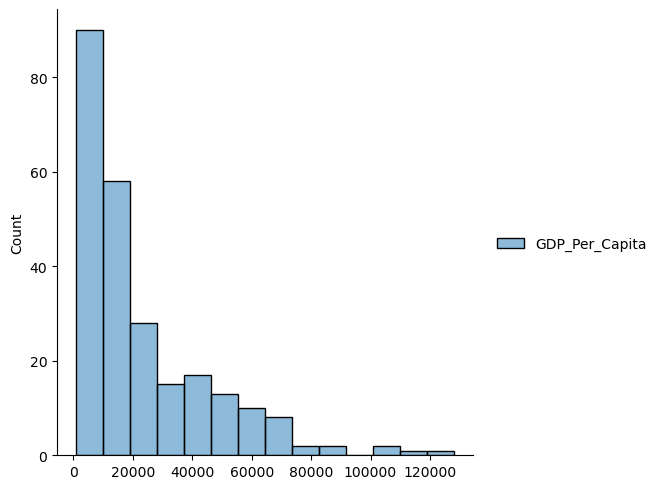

In [173]:
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]

sns.displot(data=[gdp_2020.GDP_Per_Capita])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

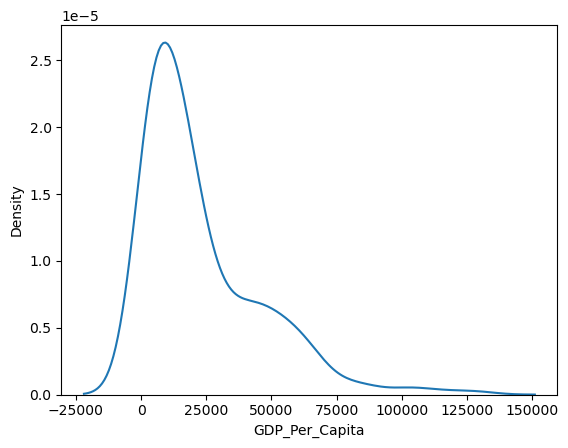

In [40]:
sns.kdeplot(gdp_2020.GDP_Per_Capita)

<Axes: xlabel='Country', ylabel='GDP_Per_Capita'>

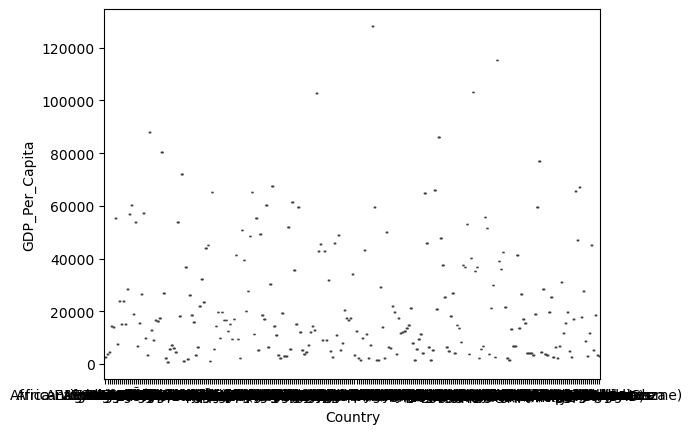

In [43]:
sns.boxplot(x=gdp_2020.Country, y=gdp_2020.GDP_Per_Capita)

<Axes: xlabel='GDP_Per_Capita'>

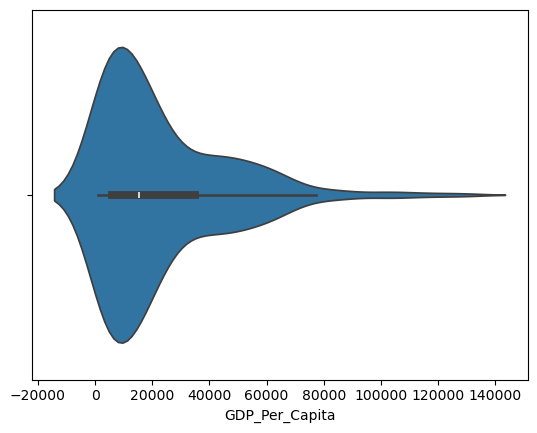

In [161]:
sns.violinplot( x = gdp_2020['GDP_Per_Capita'])

#### What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out 

<p>I think that the best plot to show distribution on this case is a histogram due to there been too many observation to look at in a different plot like a box</p>

#### What was the median GDP per capita value in 2020?

In [49]:
round(gdp_2020.GDP_Per_Capita.median(), 2)

15309.24

In [56]:
decades = [1990, 2000, 2010, 2020]

gdp_decades = gdp_df.loc[gdp_df.Year.isin(decades)]


#### For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020.

### Boxplot

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

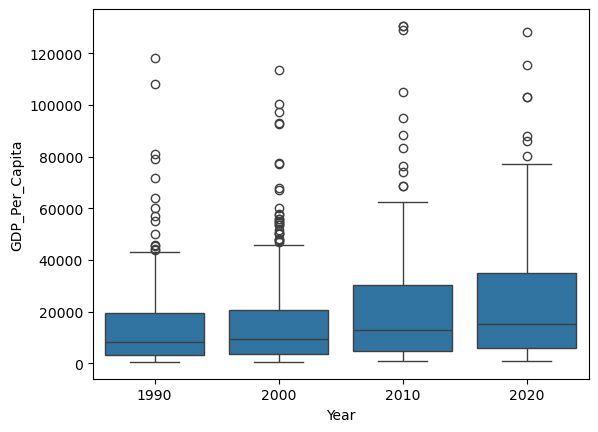

In [182]:
sns.boxplot(data=gdp_decades, x='Year',  y='GDP_Per_Capita')

### Barplot

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

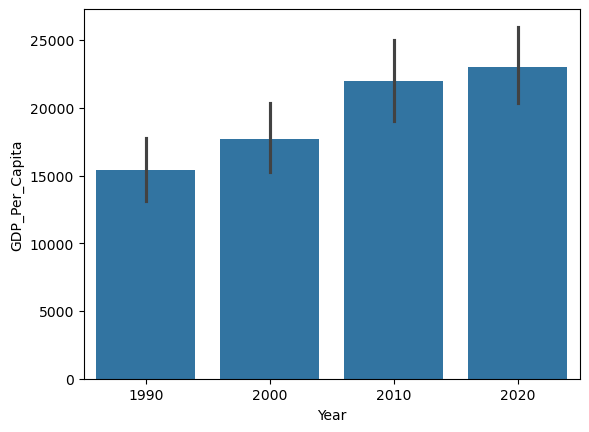

In [58]:
sns.barplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

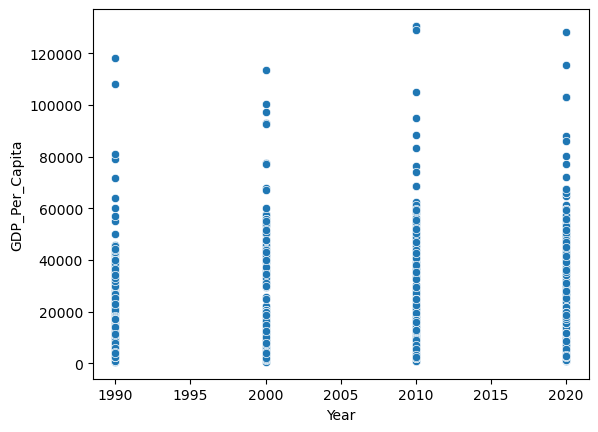

In [60]:
sns.scatterplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

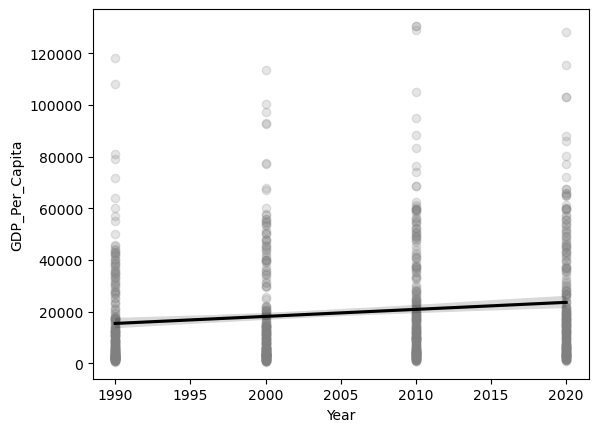

In [188]:
sns.regplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita, scatter_kws = {'color' : 'grey', 'alpha':0.2}, line_kws={'color':'black'} )

#### 

In [67]:
gdp_df.loc[gdp_df.GDP_Per_Capita > 100000].sort_values(by='Year').head(1)

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198


#### Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [94]:
max_2020_gdp = gdp_df[gdp_df.Year == 2020].GDP_Per_Capita.max()
gdp_df.loc[(gdp_df.Year == 2020) & (gdp_df.GDP_Per_Capita == max_2020_gdp)]

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198


## This would've been way easier in SQL 

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

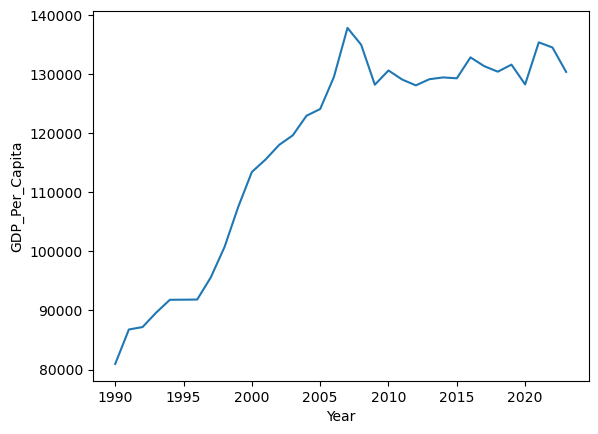

In [87]:
luxe = gdp_df.loc[gdp_df.Country == 'Luxembourg']

sns.lineplot(x=luxe.Year, y=luxe.GDP_Per_Capita)

#### Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [88]:
min_2020_gdp = gdp_df[gdp_df.Year == 2020].GDP_Per_Capita.min()
gdp_df.loc[(gdp_df.Year == 2020) & (gdp_df.GDP_Per_Capita == min_2020_gdp)]

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

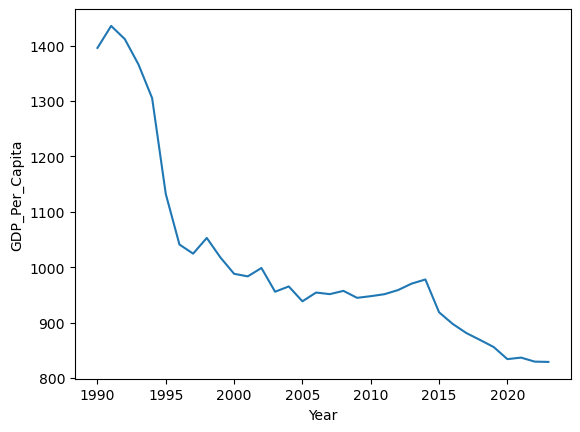

In [89]:
burundi = gdp_df.loc[gdp_df.Country == 'Burundi']

sns.lineplot(x=burundi.Year, y=burundi.GDP_Per_Capita)

#### Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990? 
<p>Yes, this is true with the exeception of an outlier which is Brunei	$118,163.68.</p>


#### Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors

In [109]:
internet_df = pd.read_csv('../data/internet_use.csv')

internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [110]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


#### Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [112]:
internet_df = internet_df.drop(['Value Footnotes'], axis=1)

In [114]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Value':'Internet_Users_Pct'})

#### 16. Look at the number of observations in this dataset per year. What do you notice?

In [123]:
year_cnt = internet_df.Year.value_counts().to_frame()

In [124]:
year_cnt.sort_values(by='Year')

,count
Year,
1990,226
1991,39
1992,50
1993,66
1994,92
1995,141
1996,177
1997,188
1998,195


In [125]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6083 non-null   object 
 1   Year                6083 non-null   int64  
 2   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 142.7+ KB


#### What is the first year to have a non-zero internet users percentage value?

In [126]:
internet_df.columns

Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')

In [190]:
int_pct_over_zero = internet_df.loc[internet_df.Internet_Users_Pct > 0].sort_values(by='Year')

int_pct_over_zero.reset_index(drop=True)

,Country,Year,Internet_Users_Pct
0,Norway,1990,0.707299
1,Italy,1990,0.017545
2,Netherlands (Kingdom of the),1990,0.334387
3,Germany,1990,0.125892
4,Israel,1990,0.110774
...,...,...,...
5798,Latvia,2023,92.187900
5799,Bosnia and Herzegovina,2023,83.377200
5800,Bangladesh,2023,44.502700
5801,Sweden,2023,95.703300


In [165]:
int_2000 = internet_df.loc[internet_df.Year == 2000]

int_2014 = internet_df.loc[internet_df.Year == 2014]

int_2000.reset_index(drop=True)

,Country,Year,Internet_Users_Pct
0,Albania,2000,0.114097
1,Algeria,2000,0.491706
2,Andorra,2000,10.538800
3,Angola,2000,0.105046
4,Anguilla,2000,22.405400
...,...,...,...
205,Virgin Islands (US),2000,13.815100
206,Wallis and Futuna,2000,4.768070
207,Yemen,2000,0.082500
208,Zambia,2000,0.191072


In [166]:
int_2000.describe()

,Year,Internet_Users_Pct
count,210.0,210.000000
mean,2000.0,9.332385
std,0.0,13.644205
min,2000.0,0.000000
25%,2000.0,0.482059
50%,2000.0,2.886680
75%,2000.0,10.539025
max,2000.0,58.620700


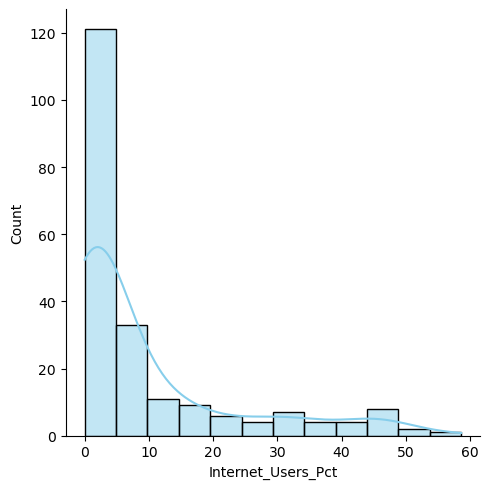

In [170]:
sns.displot(
    data=int_2000,
    x='Internet_Users_Pct',
    bins=12,
    kde = True,
    color='skyblue'
)


In [171]:
int_2014.describe()

,Year,Internet_Users_Pct
count,204.0,204.000000
mean,2014.0,45.604925
std,0.0,29.295667
min,2014.0,0.990000
25%,2014.0,17.403300
50%,2014.0,46.818000
75%,2014.0,70.262500
max,2014.0,98.158000


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

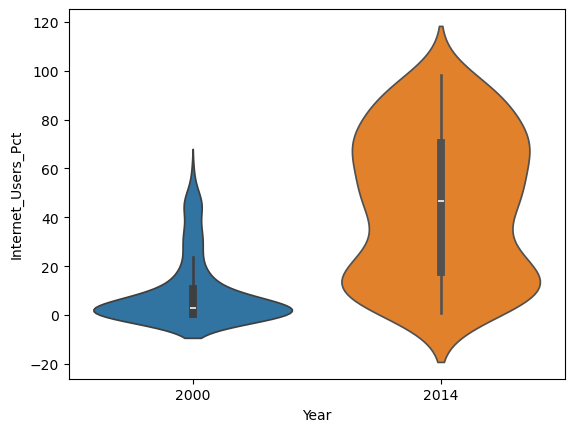

In [172]:
sns.violinplot(x=int_2000['Year'], y=int_2000['Internet_Users_Pct'])
sns.violinplot(x=int_2014['Year'], y=int_2014['Internet_Users_Pct'])

In [181]:
below_5 = int_2014.loc[int_2014.Internet_Users_Pct < 5]
below_5.sort_values(by='Internet_Users_Pct').reset_index(drop=True)

,Country,Year,Internet_Users_Pct
0,Eritrea,2014,0.99000
1,Burundi,2014,1.04239
2,Niger,2014,1.24868
3,Somalia,2014,1.63000
4,South Sudan,2014,2.60000
5,Central African Republic,2014,2.70000
6,Chad,2014,2.90000
7,Democratic Republic of the Congo,2014,3.00000
8,Guinea-Bissau,2014,3.32000
9,Madagascar,2014,3.70000


In [193]:
gdp_and_int = pd.merge(gdp_df, internet_df, on = ['Country', 'Year'])

In [203]:
top_3 = int_2014.sort_values('Internet_Users_Pct', ascending=False).Country.head(3)

In [204]:
top_3_gdp_int = gdp_and_int.loc[gdp_and_int.Country.isin(top_3)]

(0.0, 121743.1889341761)

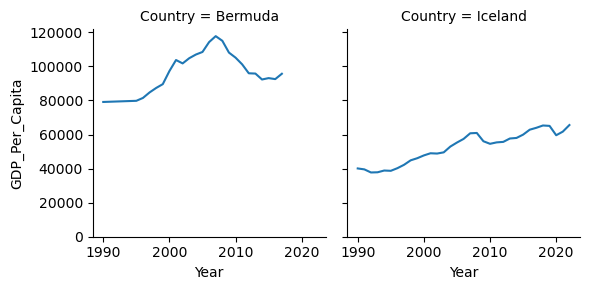

In [206]:
g = sns.FacetGrid(top_3_gdp_int, col = 'Country')
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita')
plt.ylim(bottom=0)

In [208]:
g_and_i_2014 = gdp_and_int.loc[gdp_and_int.Year == 2014]

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

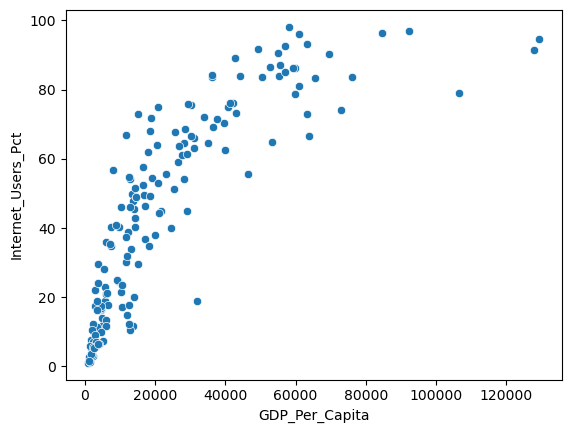

In [211]:
sns.scatterplot(data=g_and_i_2014, x='GDP_Per_Capita', y='Internet_Users_Pct')